In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision.models.detection import ssd300_vgg16

In [ ]:
def load_pretrained_ssd_model():
    # 사전 학습된 SSD300 모델 호출.
    model = ssd300_vgg16(pretrained=True) # 사전에 학습된 가중치를 사용
    model.eval()  # 평가 모드로 설정
    return model


In [ ]:
# 모델 로드
model = load_pretrained_ssd_model()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:01<00:00, 82.2MB/s]


In [ ]:
# 이미지 경로
img_path = '/content/cup.jpg'
img_path = '/content/teddy_bear.jpg'
img_path = '/content/bench.jpg'
img_path = '/content/cat1.png'


In [ ]:
# 이미지 로드, 전처리
img = Image.open(img_path).convert("RGB")

# 이미지 크기 얻기
orig_width, orig_height = img.size

transform = transforms.Compose([
    transforms.Resize((300, 300)),  # 모델 입력 크기에 맞춰 조정
    transforms.ToTensor(),  # 텐서로 변환
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # 이미지 정규화
])

img = transform(img).unsqueeze(0)  # 배치 차원 추가



In [ ]:
# 이미지에서 객체를 탐지
with torch.no_grad():  # 그라디언트 계산 비활성화
    predictions = model(img)



In [ ]:
# 예측 결과 출력
print('Predicted:', predictions)

Predicted: [{'boxes': tensor([[3.4522e+01, 0.0000e+00, 2.5219e+02, 3.0000e+02],
        [7.9900e+01, 1.2354e+00, 1.0861e+02, 4.4904e+01],
        [9.2036e+01, 7.2819e+00, 1.0716e+02, 4.9044e+01],
        [8.5484e+01, 9.4981e+00, 1.0108e+02, 4.5631e+01],
        [1.6434e+02, 1.2620e+02, 1.9038e+02, 1.6983e+02],
        [1.9300e+02, 2.3023e+01, 2.0205e+02, 5.1727e+01],
        [9.2768e+01, 2.5084e+00, 1.2084e+02, 5.2895e+01],
        [1.0014e+02, 6.7192e+00, 1.1454e+02, 5.0627e+01],
        [2.9693e+00, 1.0517e+01, 1.7147e+01, 4.8864e+01],
        [1.6667e+02, 1.3125e+02, 1.8098e+02, 1.6555e+02],
        [1.4293e+02, 2.1859e+02, 1.7018e+02, 2.5119e+02],
        [4.0340e+00, 2.8255e+00, 3.6843e+01, 4.2981e+01],
        [7.5659e+01, 2.7351e+00, 9.2582e+01, 3.7235e+01],
        [1.1586e+02, 1.6103e+02, 1.4119e+02, 2.0067e+02],
        [1.8232e+02, 8.5295e+00, 2.0680e+02, 4.7669e+01],
        [1.9196e+02, 7.6660e+00, 2.0102e+02, 3.6216e+01],
        [9.0063e+01, 1.3681e+00, 1.1019e+02, 2.696

[결과해석] <br><br>
boxes(경계 상자): 탐지된 객체의 경계 상자의 좌표를 포함하는 텐서<br>
각 상자의 좌표 정보[x_min, y_min, x_max, y_max] 형태 => 이미지 내에서 객체의 위치<br><br>
labels: 탐지된 각 객체의 클래스 ID를 나타내는 텐서 = 데이터셋의 특정 클래스<br>
scores: 각 탐지에 대한 신뢰도 점수(텐서)=모델의 해당 객체에 대한 신뢰도<br>
높은 점수는 더 높은 신뢰도를 의미

경계 상자(boxes):첫 번째 경계 상자 [62.6710, 11.4240, 161.0400, 280.8900]<br> 이미지의 좌측 상단 모서리에서 오른쪽 하단 모서리까지의 직사각형 영역을 나타냄<br>이곳에 객체가 존재함을 의미<br><br>
클래스 레이블(labels):88(labels의 첫 번째 값)은 COCO 데이터셋의 클래스 인덱스 중 하나<br> COCO 데이터셋의 클래스 목록을 통해 각 숫자가 실제 어떤 객체를 나타내는지는 확인 <br>
COCO 데이터셋의 88번 클래스는 2017 버전에서 "teddy bear"
<br><br>
신뢰도 점수(scores):0.9108(첫 번째 객체의 신뢰도 점수)<br>
모델이 해당 객체 탐지 결과를 약 91.08%의 확신을 가지고 있다는 의미<br> 신뢰도 점수가 높을수록 탐지 결과의 정확도가 높다고 해석

In [ ]:
# 예측 결과 처리

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# COCO 2017 클래스 이름 목록
COCO_INSTANCE_CATEGORY_NAMES = [
    'background', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus','train', 'truck', 'boat', 'traffic light',
    'fire hydrant', '???', 'stop sign','parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep',
    'cow', 'elephant', 'bear', 'zebra', 'giraffe', '????', 'backpack', 'umbrella', '?_?', '?????',
    'handbag', 'tie','suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
    'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', '?', 'wine glass','cup','fork','knife','spoon',
    'bowl','banana','apple','sandwich','orange','broccoli','carrot','hot dog','pizza','donut',
    'cake','chair','couch','potted plant','bed','???','dining table','???','???','toilet',
    '???', 'tv','laptop','mouse','remote','keyboard','cell phone','microwave','oven','toaster',
    'sink','refrigerator','book','clock','???','vase','scissors','teddy bear','hair drier','toothbrush']


In [ ]:
COCO_INSTANCE_CATEGORY_NAMES[17]

'cat'

In [ ]:
# 예측 결과 가져오기
pred_scores = predictions[0]['scores'].numpy()
pred_boxes = predictions[0]['boxes'].numpy()
pred_labels = predictions[0]['labels'].numpy()

In [ ]:
print(pred_scores)
print(pred_boxes)
print(pred_labels)

[0.9999118  0.05635109 0.04058544 0.0342955  0.03395325 0.0312985
 0.03114224 0.0298267  0.02963194 0.02717333 0.02704071 0.02673005
 0.026421   0.02621136 0.02578373 0.02492063 0.02437568 0.02335001
 0.02287433 0.02208067 0.02203601 0.02200231 0.02153633 0.02125723
 0.02111718 0.01990839 0.01903985 0.01902876 0.01846404 0.01759733
 0.01745976 0.01734236 0.01731548 0.0172458  0.01722056 0.0171474
 0.01671492 0.01635485 0.01621421 0.01612836 0.01587128 0.01581378
 0.01554977 0.0149664  0.01474373 0.01470051 0.01458048 0.01402873
 0.01398905 0.0139545  0.01373028 0.01317447 0.01310667 0.01309614
 0.01306567 0.01291304 0.01280831 0.01277189 0.01274114 0.01271954
 0.01250361 0.01244703 0.01233442 0.01231111 0.01222143 0.01214045
 0.01207932 0.01202789 0.0118891  0.01176942 0.01166157 0.01159681
 0.01155194 0.01150334 0.01143734 0.01127599 0.01090102 0.0108899
 0.0108775  0.0108247  0.01080469 0.01079635 0.01078884 0.01076294
 0.0106806  0.01048941 0.01048033 0.01043129 0.01040561 0.0103990

In [ ]:
# 신뢰도가 가장 높은 결과 가져오기
max_score_idx = pred_scores.argmax()
score = pred_scores[max_score_idx]

In [ ]:
print(pred_boxes[max_score_idx])

[ 34.521584   0.       252.18521  300.      ]


In [ ]:
score

0.9999118

17


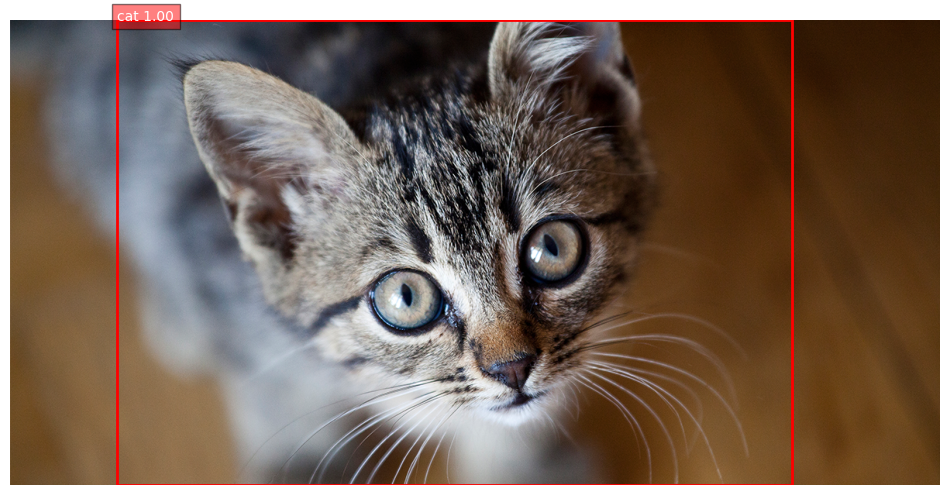

In [ ]:
# 결과 시각화
img = Image.open(img_path).convert("RGB")
plt.figure(figsize=(12, 12))
plt.imshow(img)
ax = plt.gca()

if score > 0.5:
    box = pred_boxes[max_score_idx]
    # 경계 상자 좌표를 원본 이미지 크기에 맞게 조정
    box = [
        (box[0] / 300) * orig_width,
        (box[1] / 300) * orig_height,
        (box[2] / 300) * orig_width,
        (box[3] / 300) * orig_height
    ]

    # print(box)
    label = pred_labels[max_score_idx]
    print(label) # 88
    x_min, y_min, x_max, y_max = box
    rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
        linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    label_name = COCO_INSTANCE_CATEGORY_NAMES[label]
    # label_name = COCO_INSTANCE_CATEGORY_NAMES[pred_labels[max_score_idx]]
    # print(label_name)
    ax.text(x_min, y_min, f'{label_name} {score:.2f}', color='white',
            bbox=dict(facecolor='red', alpha=0.5))


plt.axis('off')
plt.show()
